In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import utils as ft_nous

In [3]:
rename_columns = [
					"index",
					"date_urg",
					"conduite",
					"m_entry",
					"m_venue",
					"age",
					"atcd_med",
					"atcd_chir",
					"cst_paspad",
					"fc_ad",
					"tmp_ad",
					"saoxy_ad",
					"fr_ad",
					"ccmu",
					"salle",
					"date_box",
					"anamn",
					"obs",
					"have_bio",
					"have_radio",
					"have_echo",
					"have_scan",
					"have_irm",
					"have_specia",
					"date_prescri_bio",
					"date_prelev_bio",
					"code_diag",
					"intitule_diag",
					"cac_admi",
					"cac_sejour",
					"date_sortie",
					"date_deb_pec_med",
					"dossier_hopit",
					"type_orient",
					"destination",
					"transfert_service",
					"transfert_hopit",
					"cp_ville",
					"ville"
					]
rename_columns


['index',
 'date_urg',
 'conduite',
 'm_entry',
 'm_venue',
 'age',
 'atcd_med',
 'atcd_chir',
 'cst_paspad',
 'fc_ad',
 'tmp_ad',
 'saoxy_ad',
 'fr_ad',
 'ccmu',
 'salle',
 'date_box',
 'anamn',
 'obs',
 'have_bio',
 'have_radio',
 'have_echo',
 'have_scan',
 'have_irm',
 'have_specia',
 'date_prescri_bio',
 'date_prelev_bio',
 'code_diag',
 'intitule_diag',
 'cac_admi',
 'cac_sejour',
 'date_sortie',
 'date_deb_pec_med',
 'dossier_hopit',
 'type_orient',
 'destination',
 'transfert_service',
 'transfert_hopit',
 'cp_ville',
 'ville']

In [4]:
df = pd.read_excel("../database/db_urg_liteplus.xlsx", index_col=0, header=0, names = rename_columns)
df

,date_urg,conduite,m_entry,m_venue,age,atcd_med,atcd_chir,cst_paspad,fc_ad,tmp_ad,...,cac_sejour,date_sortie,date_deb_pec_med,dossier_hopit,type_orient,destination,transfert_service,transfert_hopit,cp_ville,ville
index,,,,,,,,,,,,,,,,,,,,,
1,2016-06-01 00:16:00,AMBULANCE PRIVEE,"Malaise, difficulté respi, palpitation, Pas de...",Cardiologie: Palpitations Malaise,33,NaN,NaN,110/56,52,34.9,...,3093.0,42522.176389,42522.043750,NaN,RETOUR DOMICILE,RETOUR DOMICILE,NaN,NaN,59139.0,WATTIGNIES
2,2016-06-01 00:18:00,AMBULANCE PRIVEE,"AEG, Hyperthermie et difficulté respi en maiso...",Maladies infectieuses: Hyperthermie,78,NaN,NaN,90/41,77,36.3,...,3102.0,42522.461806,42522.093056,NaN,TRANSFERT EXTERNE,Transfert CLINIQUE DUBOIS (LILLE) Motif: Conve...,NaN,CLINIQUE DUBOIS,59310.0,ORCHIES
3,2016-06-01 00:36:00,POMPIERS,NaN,NaN,77,NaN,NaN,137/77,97,36.5,...,3102.0,42522.127778,NaN,NaN,TRANSFERT INTERNE,Admis(e) en NEUROLOGIE B 5 EST (3281/CAC),NEUROLOGIE B 5 EST,NaN,59480.0,LA BASSEE
4,2016-06-01 00:43:00,MOYENS PERSONNELS,"1A, Hyperthermie ne cédant pas au paracetamol,...",Maladies infectieuses: Hyperthermie,38,NaN,NaN,117/71,118,38.2,...,3093.0,42522.201389,42522.081250,NaN,RETOUR DOMICILE,RETOUR DOMICILE,NaN,NaN,59136.0,WAVRIN
5,2016-06-01 01:16:00,AMBULANCE PRIVEE,"Douleur bras gauche et mollet gauche, hémiplég...",Cardiologie: Phlébite,69,décembre 2007 : infarctus capsulo caudé droit ...,NaN,137/79,70,36.1,...,3102.0,42522.663194,42522.107639,NaN,RETOUR DOMICILE,RETOUR DOMICILE,NaN,NaN,59130.0,LAMBERSART
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61488,2017-02-26 02:34:00,SAMU-SMUR,NaN,NaN,78,NaN,NaN,44058,72,36.3,...,3102.0,42792.137500,42792.108333,NaN,TRANSFERT INTERNE,Admis(e) en SOINS INTENSIFS NEUROVASCULAIRES (...,SOINS INTENSIFS NEUROVASCULAIRES,NaN,59760.0,GRANDE SYNTHE
61489,2017-02-26 02:43:00,MOYENS PERSONNELS,NaN,NaN,36,NaN,NaN,NaN,NaN,NaN,...,3098.0,42792.122917,NaN,NaN,NON PRIS EN CHARGE,NON PRIS EN CHARGE,NaN,NaN,59000.0,LILLE
61490,2017-02-26 02:52:00,MOYENS PERSONNELS,suspicion cellulite dentaire,Stomatologie: Abcès/Cellulite dentaire,45,hypertriglycéridémie crise de goutte,amygdalectomie,135/95,125,37.8,...,3102.0,42792.582639,42792.131944,NaN,TRANSFERT INTERNE,Admis(e) en CHIR.MAXILLO FAC.& STOMATO OUEST (...,CHIR.MAXILLO FAC.& STOMATO OUEST,NaN,59370.0,MONS EN BAROEUL


Je veux obtenir la prédiction du temps d'attente selon la pathologie du patient quand il arrive.
Je vais partir sur l'hypothèse que c'est un temps qu'il faut avoir dès l'arrivée, je ne prendrais du coup pour entrainer le modèle que des valeurs que l'on sait quand le patient arrive.
Je vais me restreindre au code ccmu, qui est un code qui permet de classer les patients selon leur pathologie.
Le code ccmu, moyen d'arrivée, le motif de venue, l'âge devrait être des facteurs importants pour prédire le temps d'attente.

In [5]:
df = ft_nous.pipeline_t_by_p(df)

In [6]:
df

,date_urg,conduite,m_venue,age,ccmu,date_sortie
index,,,,,,
1,2016-06-01 00:16:00,AMBULANCE PRIVEE,Cardiologie: Palpitations Malaise,33,1,2016-06-01 04:14:00.000001
2,2016-06-01 00:18:00,AMBULANCE PRIVEE,Maladies infectieuses: Hyperthermie,78,2,2016-06-01 11:05:00.000003
3,2016-06-01 00:36:00,POMPIERS,NaN,77,2,2016-06-01 03:04:00.000002
4,2016-06-01 00:43:00,MOYENS PERSONNELS,Maladies infectieuses: Hyperthermie,38,1,2016-06-01 04:50:00.000000
5,2016-06-01 01:16:00,AMBULANCE PRIVEE,Cardiologie: Phlébite,69,2,2016-06-01 15:54:59.999996
...,...,...,...,...,...,...
61488,2017-02-26 02:34:00,SAMU-SMUR,NaN,78,2,2017-02-26 03:17:59.999999
61489,2017-02-26 02:43:00,MOYENS PERSONNELS,NaN,36,NaN,2017-02-26 02:57:00.000003
61490,2017-02-26 02:52:00,MOYENS PERSONNELS,Stomatologie: Abcès/Cellulite dentaire,45,2,2017-02-26 13:59:00.000001


On ne peut pas prédire si le code ccmu ou le motif de venue est vide

In [7]:
df = df.dropna(subset=["ccmu","m_venue"])
df

,date_urg,conduite,m_venue,age,ccmu,date_sortie
index,,,,,,
1,2016-06-01 00:16:00,AMBULANCE PRIVEE,Cardiologie: Palpitations Malaise,33,1,2016-06-01 04:14:00.000001
2,2016-06-01 00:18:00,AMBULANCE PRIVEE,Maladies infectieuses: Hyperthermie,78,2,2016-06-01 11:05:00.000003
4,2016-06-01 00:43:00,MOYENS PERSONNELS,Maladies infectieuses: Hyperthermie,38,1,2016-06-01 04:50:00.000000
5,2016-06-01 01:16:00,AMBULANCE PRIVEE,Cardiologie: Phlébite,69,2,2016-06-01 15:54:59.999996
6,2016-06-01 01:20:00,AMBULANCE PRIVEE,Orl: Vertiges,80,1,2016-06-01 04:36:59.999998
...,...,...,...,...,...,...
61485,2017-02-26 02:19:00,MOYENS PERSONNELS,Neurologie: Céphalées,38,2,2017-02-26 04:59:00.000001
61486,2017-02-26 02:24:00,AMBULANCE PRIVEE,Pneumologie: Toux isolée,48,1,2017-02-26 03:15:00.000002
61490,2017-02-26 02:52:00,MOYENS PERSONNELS,Stomatologie: Abcès/Cellulite dentaire,45,2,2017-02-26 13:59:00.000001


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55698 entries, 1 to 61492
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date_urg     55698 non-null  datetime64[ns]
 1   conduite     55683 non-null  object        
 2   m_venue      55698 non-null  object        
 3   age          55698 non-null  int64         
 4   ccmu         55698 non-null  object        
 5   date_sortie  55698 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 3.0+ MB


On va encoder les colonnes catégories, donc le ccmu et les conduites

In [9]:
def df_enc(dfp,categories):
	for i in categories:
			dumb = pd.get_dummies(dfp[i])
			dfp = pd.concat([dfp, dumb], axis = 1)
			dfp = dfp.drop([i], axis = 1)
	return dfp

df = df_enc(df,["ccmu","conduite"])
df


,date_urg,m_venue,age,date_sortie,1,2,3,4,5,D,P,AMB PUBLIQUE (VSAB),AMB PUBLIQUE CHRU,AMBULANCE PRIVEE,AUTRES,HELICOPTERE,MOYENS PERSONNELS,POMPIERS,SAMU-SMUR,TAXI
index,,,,,,,,,,,,,,,,,,,,
1,2016-06-01 00:16:00,Cardiologie: Palpitations Malaise,33,2016-06-01 04:14:00.000001,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,2016-06-01 00:18:00,Maladies infectieuses: Hyperthermie,78,2016-06-01 11:05:00.000003,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,2016-06-01 00:43:00,Maladies infectieuses: Hyperthermie,38,2016-06-01 04:50:00.000000,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
5,2016-06-01 01:16:00,Cardiologie: Phlébite,69,2016-06-01 15:54:59.999996,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False
6,2016-06-01 01:20:00,Orl: Vertiges,80,2016-06-01 04:36:59.999998,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61485,2017-02-26 02:19:00,Neurologie: Céphalées,38,2017-02-26 04:59:00.000001,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False
61486,2017-02-26 02:24:00,Pneumologie: Toux isolée,48,2017-02-26 03:15:00.000002,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
61490,2017-02-26 02:52:00,Stomatologie: Abcès/Cellulite dentaire,45,2017-02-26 13:59:00.000001,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False


Pour label nous devons prédire le temps d'attente, on va alors faire un delta entre l'heure d'arrivée et l'heure de sortie

In [10]:
df["temps_urg"] = df["date_sortie"] - df["date_urg"]
df

,date_urg,m_venue,age,date_sortie,1,2,3,4,5,D,...,AMB PUBLIQUE (VSAB),AMB PUBLIQUE CHRU,AMBULANCE PRIVEE,AUTRES,HELICOPTERE,MOYENS PERSONNELS,POMPIERS,SAMU-SMUR,TAXI,temps_urg
index,,,,,,,,,,,,,,,,,,,,,
1,2016-06-01 00:16:00,Cardiologie: Palpitations Malaise,33,2016-06-01 04:14:00.000001,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,0 days 03:58:00.000001
2,2016-06-01 00:18:00,Maladies infectieuses: Hyperthermie,78,2016-06-01 11:05:00.000003,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,0 days 10:47:00.000003
4,2016-06-01 00:43:00,Maladies infectieuses: Hyperthermie,38,2016-06-01 04:50:00.000000,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,0 days 04:07:00
5,2016-06-01 01:16:00,Cardiologie: Phlébite,69,2016-06-01 15:54:59.999996,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,0 days 14:38:59.999996
6,2016-06-01 01:20:00,Orl: Vertiges,80,2016-06-01 04:36:59.999998,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,0 days 03:16:59.999998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61485,2017-02-26 02:19:00,Neurologie: Céphalées,38,2017-02-26 04:59:00.000001,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,0 days 02:40:00.000001
61486,2017-02-26 02:24:00,Pneumologie: Toux isolée,48,2017-02-26 03:15:00.000002,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,0 days 00:51:00.000002
61490,2017-02-26 02:52:00,Stomatologie: Abcès/Cellulite dentaire,45,2017-02-26 13:59:00.000001,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,0 days 11:07:00.000001


In [11]:
df = df.drop(["date_urg","date_sortie"], axis = 1)
df

,m_venue,age,1,2,3,4,5,D,P,AMB PUBLIQUE (VSAB),AMB PUBLIQUE CHRU,AMBULANCE PRIVEE,AUTRES,HELICOPTERE,MOYENS PERSONNELS,POMPIERS,SAMU-SMUR,TAXI,temps_urg
index,,,,,,,,,,,,,,,,,,,
1,Cardiologie: Palpitations Malaise,33,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,0 days 03:58:00.000001
2,Maladies infectieuses: Hyperthermie,78,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,0 days 10:47:00.000003
4,Maladies infectieuses: Hyperthermie,38,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,0 days 04:07:00
5,Cardiologie: Phlébite,69,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,0 days 14:38:59.999996
6,Orl: Vertiges,80,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,0 days 03:16:59.999998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61485,Neurologie: Céphalées,38,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,0 days 02:40:00.000001
61486,Pneumologie: Toux isolée,48,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,0 days 00:51:00.000002
61490,Stomatologie: Abcès/Cellulite dentaire,45,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,0 days 11:07:00.000001


In [12]:
df["temps_urg"] = df["temps_urg"].dt.total_seconds()/60
df

,m_venue,age,1,2,3,4,5,D,P,AMB PUBLIQUE (VSAB),AMB PUBLIQUE CHRU,AMBULANCE PRIVEE,AUTRES,HELICOPTERE,MOYENS PERSONNELS,POMPIERS,SAMU-SMUR,TAXI,temps_urg
index,,,,,,,,,,,,,,,,,,,
1,Cardiologie: Palpitations Malaise,33,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,238.0
2,Maladies infectieuses: Hyperthermie,78,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,647.0
4,Maladies infectieuses: Hyperthermie,38,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,247.0
5,Cardiologie: Phlébite,69,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,879.0
6,Orl: Vertiges,80,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,197.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61485,Neurologie: Céphalées,38,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,160.0
61486,Pneumologie: Toux isolée,48,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,51.0
61490,Stomatologie: Abcès/Cellulite dentaire,45,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,667.0


In [13]:
df["temps_urg"] = (df["temps_urg"] / 15).apply(np.ceil) * 15
df

,m_venue,age,1,2,3,4,5,D,P,AMB PUBLIQUE (VSAB),AMB PUBLIQUE CHRU,AMBULANCE PRIVEE,AUTRES,HELICOPTERE,MOYENS PERSONNELS,POMPIERS,SAMU-SMUR,TAXI,temps_urg
index,,,,,,,,,,,,,,,,,,,
1,Cardiologie: Palpitations Malaise,33,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,240.0
2,Maladies infectieuses: Hyperthermie,78,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,660.0
4,Maladies infectieuses: Hyperthermie,38,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,255.0
5,Cardiologie: Phlébite,69,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,885.0
6,Orl: Vertiges,80,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,210.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61485,Neurologie: Céphalées,38,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,165.0
61486,Pneumologie: Toux isolée,48,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,60.0
61490,Stomatologie: Abcès/Cellulite dentaire,45,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,675.0


In [14]:
occurrences = df['temps_urg'].value_counts()
valeurs_plus_de_dix_fois = occurrences[occurrences > 25].index.tolist()
df_subset = df[df['temps_urg'].isin(valeurs_plus_de_dix_fois)]
print(df_subset)


                                                 m_venue  age      1      2  \
index                                                                         
1                      Cardiologie: Palpitations Malaise   33   True  False   
2                    Maladies infectieuses: Hyperthermie   78  False   True   
4                    Maladies infectieuses: Hyperthermie   38   True  False   
5                                  Cardiologie: Phlébite   69  False   True   
6                                          Orl: Vertiges   80   True  False   
...                                                  ...  ...    ...    ...   
61485                              Neurologie: Céphalées   38  False   True   
61486                           Pneumologie: Toux isolée   48   True  False   
61490            Stomatologie: Abcès/Cellulite dentaire    45  False   True   
61491  Gastro-entérologie: Douleur abdominale non épi...   18  False   True   
61492                              Neurologie: Cépha

In [15]:
df_subset["temps_urg"].value_counts()

temps_urg
105.0     2159
90.0      2115
75.0      2110
120.0     2098
135.0     2069
          ... 
1755.0      34
1695.0      31
1800.0      30
1875.0      27
1830.0      27
Name: count, Length: 121, dtype: int64

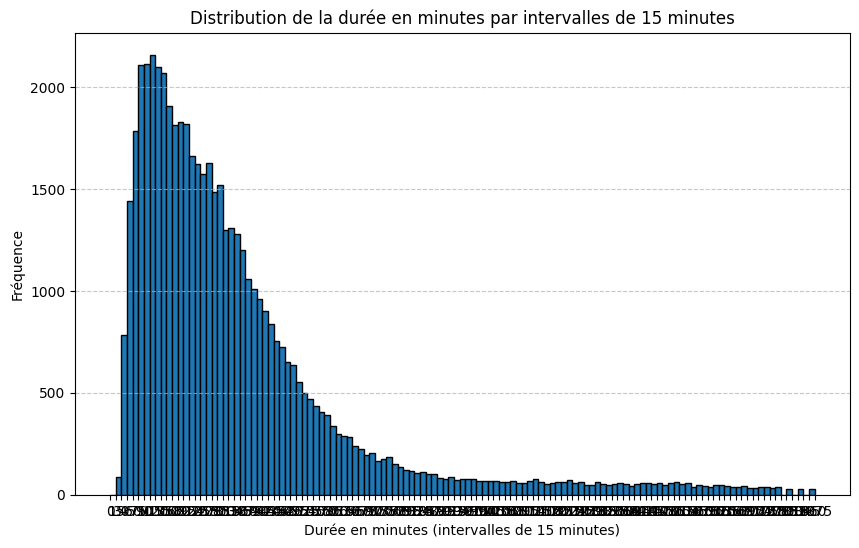

In [16]:
plt.figure(figsize=(10, 6))
plt.hist(df_subset["temps_urg"], bins=range(0, int(df_subset["temps_urg"].max()) + 15, 15), edgecolor='black')
plt.xlabel('Durée en minutes (intervalles de 15 minutes)')
plt.ylabel('Fréquence')
plt.title('Distribution de la durée en minutes par intervalles de 15 minutes')
plt.xticks(range(0, int(df_subset["temps_urg"].max()) + 15, 15))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [17]:
from scipy.stats import kstest, norm

statistic, p_value = kstest(df_subset["temps_urg"], 'norm')
print(f"Kolmogorov-Smirnov : {statistic}")
print(f"P {p_value}")
alpha = 0.05
if p_value > alpha:
    print("La distribution suit une loi normale (l'hypothèse nulle ne peut pas être rejetée)")
else:
    print("La distribution ne suit pas une loi normale (l'hypothèse nulle est rejetée)")


Kolmogorov-Smirnov : 1.0
P 0.0
La distribution ne suit pas une loi normale (l'hypothèse nulle est rejetée)


In [18]:
df_subset

,m_venue,age,1,2,3,4,5,D,P,AMB PUBLIQUE (VSAB),AMB PUBLIQUE CHRU,AMBULANCE PRIVEE,AUTRES,HELICOPTERE,MOYENS PERSONNELS,POMPIERS,SAMU-SMUR,TAXI,temps_urg
index,,,,,,,,,,,,,,,,,,,
1,Cardiologie: Palpitations Malaise,33,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,240.0
2,Maladies infectieuses: Hyperthermie,78,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,660.0
4,Maladies infectieuses: Hyperthermie,38,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,255.0
5,Cardiologie: Phlébite,69,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,885.0
6,Orl: Vertiges,80,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,210.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61485,Neurologie: Céphalées,38,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,165.0
61486,Pneumologie: Toux isolée,48,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,60.0
61490,Stomatologie: Abcès/Cellulite dentaire,45,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,675.0


In [19]:
def split_m_venue(value):
    cat, m_venue = value.split(":", 1)  # Diviser la valeur en deux parties en utilisant ":" comme séparateur, avec une seule division
    return pd.Series({'cat': cat.strip().lower(), 'm_venue': m_venue.strip().lower()})  # Retourner un objet Series avec les valeurs correctement divisées et sans espaces autour
df_subset[['cat', 'm_venue']] = df['m_venue'].apply(split_m_venue)
df_subset

/tmp/ipykernel_8082/3133297590.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset[['cat', 'm_venue']] = df['m_venue'].apply(split_m_venue)


,m_venue,age,1,2,3,4,5,D,P,AMB PUBLIQUE (VSAB),AMB PUBLIQUE CHRU,AMBULANCE PRIVEE,AUTRES,HELICOPTERE,MOYENS PERSONNELS,POMPIERS,SAMU-SMUR,TAXI,temps_urg,cat
index,,,,,,,,,,,,,,,,,,,,
1,palpitations malaise,33,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,240.0,cardiologie
2,hyperthermie,78,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,660.0,maladies infectieuses
4,hyperthermie,38,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,255.0,maladies infectieuses
5,phlébite,69,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,885.0,cardiologie
6,vertiges,80,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,210.0,orl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61485,céphalées,38,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,165.0,neurologie
61486,toux isolée,48,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,60.0,pneumologie
61490,abcès/cellulite dentaire,45,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,675.0,stomatologie


In [20]:
df_subset["m_venue"].value_counts()

m_venue
traumatisme chez un patient valide (ou en chaise)                                                         6398
douleur dentaire                                                                                          3527
traumatisme (patient non valide)                                                                          2673
douleur abdominale (patient non valide/nécessitant brancard)                                              2019
malaise                                                                                                   1620
                                                                                                          ... 
constipation nausées, vomissements douleur abdominale (patient non valide/nécessitant brancard)              1
urticaire pruritallergies: urticaire                                                                         1
douleur pharyngée dysphagiestomatologie: douleur dentaire                                               

In [21]:
import string


import nltk
from nltk.corpus import wordnet
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/cnikdel/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [22]:
def ft_lemm_str(string):
    lemmatizer = nltk.WordNetLemmatizer()
    tmp = []
    temp = string.split()
    for s in temp:
        tmp.append(lemmatizer.lemmatize(s))
    return " ".join(tmp)

In [23]:
def translator(sentence):
    translator = str.maketrans(string.punctuation, ' '*len(string.punctuation))
    tmp_sentence = sentence.lower()
    tmp_sentence = tmp_sentence.replace('\n', '')
    tmp_sentence = tmp_sentence.translate(translator)
    tmp_sentence = ft_lemm_str(tmp_sentence)
    return tmp_sentence

df_subset['m_venue'] = df_subset['m_venue'].apply(translator)
df_subset

/tmp/ipykernel_8082/3677551375.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['m_venue'] = df_subset['m_venue'].apply(translator)


,m_venue,age,1,2,3,4,5,D,P,AMB PUBLIQUE (VSAB),AMB PUBLIQUE CHRU,AMBULANCE PRIVEE,AUTRES,HELICOPTERE,MOYENS PERSONNELS,POMPIERS,SAMU-SMUR,TAXI,temps_urg,cat
index,,,,,,,,,,,,,,,,,,,,
1,palpitation malaise,33,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,240.0,cardiologie
2,hyperthermie,78,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,660.0,maladies infectieuses
4,hyperthermie,38,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,255.0,maladies infectieuses
5,phlébite,69,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,885.0,cardiologie
6,vertiges,80,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,210.0,orl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61485,céphalées,38,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,165.0,neurologie
61486,toux isolée,48,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,60.0,pneumologie
61490,abcès cellulite dentaire,45,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,675.0,stomatologie


In [24]:
df_subset["cat"] = df_subset["cat"].apply(translator)

/tmp/ipykernel_8082/2562049674.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset["cat"] = df_subset["cat"].apply(translator)


In [25]:
commonwords = pd.Series(' '.join(df_subset['m_venue']).split()).value_counts()[:20] 
commonwords

patient         14542
valide          14178
douleur         11761
traumatisme     10946
non              8980
de               8722
ou               8051
en               7078
un               6870
chez             6804
chaise           6653
dentaire         4692
abdominale       4614
abcès            2682
nécessitant      2680
épigastrique     2645
brancard         2608
sans             2450
thoracique       2366
déficit          2238
Name: count, dtype: int64

In [26]:
rarewords = pd.Series(' '.join(df_subset['m_venue']).split()).value_counts()[-300:]
rarewords

datant                   1
malaiseuronephrologie    1
ulcèretraumatologie      1
extériorisémaladies      1
urticairepsychiatrie     1
                        ..
7terrain                 1
chevaluro                1
bulleuseorl              1
ville                    1
uronéphrologiques        1
Name: count, Length: 300, dtype: int64

In [27]:
from nltk.corpus import stopwords
nltk.download("stopwords")
stop_words = set(stopwords.words('french'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/cnikdel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
def filtering(t, stpwords, rw): # Fonction pour retirer les 20 mots les plus communs et les moins communs
    words = t.split()
    filtered = [word for word in words if word not in stpwords and word not in rw]
    return " ".join(filtered)
     
df_subset['m_venue'] = df_subset['m_venue'].apply(lambda x: filtering(x, stop_words, rarewords)) # application de la fonction
df_subset

/tmp/ipykernel_8082/3393301138.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['m_venue'] = df_subset['m_venue'].apply(lambda x: filtering(x, stop_words, rarewords)) # application de la fonction


,m_venue,age,1,2,3,4,5,D,P,AMB PUBLIQUE (VSAB),AMB PUBLIQUE CHRU,AMBULANCE PRIVEE,AUTRES,HELICOPTERE,MOYENS PERSONNELS,POMPIERS,SAMU-SMUR,TAXI,temps_urg,cat
index,,,,,,,,,,,,,,,,,,,,
1,palpitation malaise,33,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,240.0,cardiologie
2,hyperthermie,78,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,660.0,malady infectieuses
4,hyperthermie,38,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,255.0,malady infectieuses
5,phlébite,69,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,885.0,cardiologie
6,vertiges,80,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,210.0,orl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61485,céphalées,38,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,165.0,neurologie
61486,toux isolée,48,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,60.0,pneumologie
61490,abcès cellulite dentaire,45,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,675.0,stomatologie


In [29]:
from nltk.tokenize import word_tokenize
nltk.download("punkt") #librarie de tokenization

[nltk_data] Downloading package punkt to /home/cnikdel/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [30]:
df_subset["m_venue"] = df_subset["m_venue"].apply(lambda x: ' '.join(word_tokenize(x))) # tokenization
df_subset["cat"] = df_subset["cat"].apply(lambda x: ' '.join(word_tokenize(x)))
df_subset

/tmp/ipykernel_8082/3785379239.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset["m_venue"] = df_subset["m_venue"].apply(lambda x: ' '.join(word_tokenize(x))) # tokenization
/tmp/ipykernel_8082/3785379239.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset["cat"] = df_subset["cat"].apply(lambda x: ' '.join(word_tokenize(x)))


,m_venue,age,1,2,3,4,5,D,P,AMB PUBLIQUE (VSAB),AMB PUBLIQUE CHRU,AMBULANCE PRIVEE,AUTRES,HELICOPTERE,MOYENS PERSONNELS,POMPIERS,SAMU-SMUR,TAXI,temps_urg,cat
index,,,,,,,,,,,,,,,,,,,,
1,palpitation malaise,33,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,240.0,cardiologie
2,hyperthermie,78,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,660.0,malady infectieuses
4,hyperthermie,38,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,255.0,malady infectieuses
5,phlébite,69,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,885.0,cardiologie
6,vertiges,80,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,210.0,orl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61485,céphalées,38,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,165.0,neurologie
61486,toux isolée,48,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,60.0,pneumologie
61490,abcès cellulite dentaire,45,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,675.0,stomatologie


In [31]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [32]:
dfs = df_subset.copy().drop(["temps_urg"],axis = 1).reset_index(drop=True)
dfsy = df_subset["temps_urg"].copy().reset_index(drop=True)
dfs

,m_venue,age,1,2,3,4,5,D,P,AMB PUBLIQUE (VSAB),AMB PUBLIQUE CHRU,AMBULANCE PRIVEE,AUTRES,HELICOPTERE,MOYENS PERSONNELS,POMPIERS,SAMU-SMUR,TAXI,cat
0,palpitation malaise,33,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,cardiologie
1,hyperthermie,78,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,malady infectieuses
2,hyperthermie,38,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,malady infectieuses
3,phlébite,69,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,cardiologie
4,vertiges,80,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,orl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53934,céphalées,38,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,neurologie
53935,toux isolée,48,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,pneumologie
53936,abcès cellulite dentaire,45,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,stomatologie
53937,douleur abdominale non épigastrique patient va...,18,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,gastro entérologie


In [33]:
dfs.shape

(53939, 19)

In [34]:
from sklearn.feature_extraction.text import TfidfTransformer

texte_columns = dfs['m_venue'] + " " + dfs['cat']
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(texte_columns.values.astype('U'))
#tfidf_transformer = TfidfTransformer()
#X = tfidf_transformer.fit_transform(tfidf_matrix)
#X.toarray()

In [35]:
dfs["cat"].shape

(53939,)

In [36]:
tfidf_matrix.shape

(53939, 632)

In [37]:
numerical_columns = dfs[['age']].values.astype(float)
scaler = StandardScaler()
scaled_numerical = scaler.fit_transform(numerical_columns)


In [38]:
scaled_numerical.shape

(53939, 1)

In [39]:
all_features = pd.concat([pd.DataFrame(tfidf_matrix.toarray()), pd.DataFrame(scaled_numerical)], axis=1)

In [40]:
all_features

,0,1,2,3,4,5,6,7,8,9,...,623,624,625,626,627,628,629,630,631,0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.532547
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.606841
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.294837
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.178963
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.701925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53934,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.294837
53935,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.180583
53936,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.037957
53937,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.245676


In [41]:
all_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53939 entries, 0 to 53938
Columns: 633 entries, 0 to 0
dtypes: float64(633)
memory usage: 260.5 MB


In [42]:
dfs.columns

Index([            'm_venue',                 'age',                     1,
                           2,                     3,                     4,
                           5,                   'D',                   'P',
       'AMB PUBLIQUE (VSAB)',  'AMB PUBLIQUE CHRU ',    'AMBULANCE PRIVEE',
                    'AUTRES',         'HELICOPTERE',   'MOYENS PERSONNELS',
                  'POMPIERS',           'SAMU-SMUR',                'TAXI',
                       'cat'],
      dtype='object')

In [43]:
all_features[[ 1,
                           2,                     3,                     4,
                           5,                   'D',                   'P',
       'AMB PUBLIQUE (VSAB)',  'AMB PUBLIQUE CHRU ',    'AMBULANCE PRIVEE',
                    'AUTRES',         'HELICOPTERE',   'MOYENS PERSONNELS',
                  'POMPIERS',           'SAMU-SMUR',                'TAXI',]] = dfs[[ 1,
                           2,                     3,                     4,
                           5,                   'D',                   'P',
       'AMB PUBLIQUE (VSAB)',  'AMB PUBLIQUE CHRU ',    'AMBULANCE PRIVEE',
                    'AUTRES',         'HELICOPTERE',   'MOYENS PERSONNELS',
                  'POMPIERS',           'SAMU-SMUR',                'TAXI',]]

In [44]:
all_features.describe()

,0,6,7,8,9,10,11,12,13,14,...,623,624,625,626,627,628,629,630,631,0
count,53939.000000,53939.000000,53939.000000,53939.000000,53939.000000,53939.000000,53939.000000,53939.000000,53939.000000,53939.000000,...,53939.000000,53939.000000,53939.000000,53939.000000,53939.000000,53939.000000,53939.000000,53939.000000,53939.000000,5.393900e+04
mean,0.000346,0.000040,0.000025,0.014750,0.000104,0.000038,0.000071,0.000263,0.000052,0.000176,...,0.000097,0.000128,0.000064,0.000029,0.000021,0.001261,0.000044,0.009524,0.002265,-1.448380e-16
std,0.012608,0.004683,0.003404,0.077475,0.007702,0.005047,0.006280,0.013043,0.006057,0.010222,...,0.008579,0.009437,0.006794,0.004736,0.003530,0.026247,0.005133,0.062931,0.037688,1.000009e+00
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.388301e+00
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-8.653401e-01
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.472949e-01
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.035438e-01
max,0.574705,0.563092,0.512482,0.462169,0.598807,0.676775,0.630102,0.670265,0.722779,0.648676,...,0.814671,0.774477,0.815338,0.777781,0.646054,0.557364,0.663223,0.467320,0.653723,2.747847e+00


In [45]:
all_features.isna().sum()

0                    0
1                    0
2                    0
3                    0
4                    0
                    ..
HELICOPTERE          0
MOYENS PERSONNELS    0
POMPIERS             0
SAMU-SMUR            0
TAXI                 0
Length: 644, dtype: int64

In [46]:
all_features.columns = all_features.columns.astype(str)
pca = PCA(n_components=5)
pca_result = pca.fit_transform(all_features)

In [50]:
pca.explained_variance_ratio_

array([0.38887191, 0.09990863, 0.09088558, 0.04941142, 0.03952278])

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
!pip install xgboost
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, accuracy_score

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 605.1 kB/s eta 0:00:0000:0100:02


In [52]:
X_train, X_test, y_train, y_test = train_test_split(pca_result, dfsy, test_size=0.2, random_state=42)

In [67]:
model = XGBRegressor()
model.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
predictions = model.predict(X_test)

In [69]:
from sklearn.metrics import mean_absolute_error

# Calculer l'erreur absolue moyenne entre les prédictions et les valeurs réelles
mae = mean_absolute_error(y_test,predictions)

# Définir une marge d'erreur de 15 minutes (exprimée en unités de temps appropriées, par exemple, secondes)
marge_erreur = 600  # 15 minutes en secondes

# Calculer le nombre d'échantillons dont l'erreur est inférieure ou égale à la marge d'erreur
nb_correct = sum(abs(y_test - predictions) <= marge_erreur)

# Calculer la précision à 15 minutes près
precision_15min = nb_correct / len(y_test)

# Afficher la précision à 15 minutes près
print(f"Précision à 15 minutes près : {precision_15min * 100:.2f}%")


Précision à 15 minutes près : 95.08%


In [55]:


from sklearn.metrics import precision_score, recall_score, confusion_matrix

confusion_matrix(y_test, linear_reg_pred, normalize="true")

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets